## Trening 1

### Parametry treningu:

* Ilość klas: **`2`**
* Ilość zdjęć: **`40`**
* Podział train/test: **`30 / 10`**
* Rozmiar zdjęć: **`500 x 400`**
* Ilość epok: **`50`**
* Learning rate: **`0.001`**
* Batch size: **`8`**

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from torch.utils.data import DataLoader

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
num_epochs = 50
batch_size = 8
learning_rate = 0.001

In [9]:
train_dataset = "../../40_2_classes/train"
test_dataset = "../../40_2_classes/test"

In [10]:
train_data = torchvision.datasets.ImageFolder(
    train_dataset,
    transforms.Compose([transforms.Resize((500, 400)), transforms.ToTensor()]),
)

test_data = torchvision.datasets.ImageFolder(
    test_dataset,
    transforms.Compose([transforms.Resize((500, 400)), transforms.ToTensor()]),
)
train_data.classes

['glass', 'metal']

In [11]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [12]:
classes = ("glass", "metal")

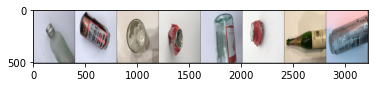

In [13]:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 122 * 97, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 122 * 97)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
n_total_steps = len(train_loader)
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}"
            )

print("Finished Training")
# PATH = "./cnn.pth"
# torch.save(model.state_dict(), PATH)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Bartek\anaconda3\envs\CRAI\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 50/50 [00:21<00:00,  2.32it/s]

Finished Training


In [17]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(len(train_data.classes))]
    n_class_samples = [0 for i in range(len(train_data.classes))]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of the network: {acc} %")

    for i in range(len(train_data.classes)):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f"Accuracy of {classes[i]}: {acc} %")

IndexError: index 4 is out of bounds for dimension 0 with size 4